<a href="https://colab.research.google.com/github/aspiringastro/practical_deep_learning/blob/main/SDSS_Galaxy_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import os
from IPython.display import Image, display
from pathlib import Path

import pandas as pd
import numpy as np
from google.colab import drive


In [4]:
!pip install -qq fastai

In [5]:
from fastprogress.fastprogress import master_bar, progress_bar
from time import sleep
from fastai.vision.all import *

In [6]:

# Morphological classifications of SDSS main sample spectroscopic galaxies from Galaxy Zoo 2. This data is used to establish the labeled classification built through human agents.
# There are 239,695 galaxies in total in this dataset
hdf = pd.read_csv('http://gz2hart.s3.amazonaws.com/gz2_hart16.csv.gz', compression='gzip')
hart_morph_classes = hdf.gz2_class.unique()
print(f'Number of Hart16 morphological galaxy classes: {len(hart_morph_classes)}')

Number of Hart16 morphological galaxy classes: 818


In [7]:
def sdss_get_params(ra, dec, scale=0.2, width=256, height=256, opt=''):
    return {
        'TaskName': 'Skyserver.Chart.Navi',
        'ra'      : ra,
        'dec'     : dec,
        'scale'   : scale,
        'width'   : width,
        'height'  : height,
        'opt'     : opt
    }


def sdss_download_image(dest_path, params, filename, force=False):
    base_url='http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg'
    image_file = f'{dest_path}/{filename}.jpg'
    image_path = Path(image_file)
    if image_path.is_file() and force == False:
        return { 'success': True, 'file': image_file, 'code': 303 }
    resp = requests.get(base_url, params)
    if resp.status_code == 200:
        with open(image_file, 'wb') as f:
            f.write(resp.content)
        return { 'success': True, 'file': image_file, 'code': resp.status_code }
    else:
        return { 'success': False, 'file': image_file, 'code': resp.status_code }


def sdss_download_dataset(hdf, morph_class, base_path, per_class_limit=25):
    image_count = 0
    mb = master_bar(range(len(morph_class)))
    for i in mb:
        mc=morph_class[i]
        mc_path = f'{base_path}/{mc}'
        os.makedirs(mc_path, exist_ok=True)
        mb.main_bar.comment = f'{mc} Class'
        image_list = ([name for name in os.listdir(mc_path) if os.path.isfile(os.path.join(mc_path, name))])
        sample_requested = per_class_limit - len(image_list)
        if len(image_list) >= per_class_limit:
          continue
        rows = hdf[hdf['gz2_class'] == mc]
        unique_objects = rows.dr7objid.unique()
        if rows.shape[0] < sample_requested:
          sample_requested = rows.shape[0]
        sample_downloaded = 0
        print(f'{mc} : {len(image_list)} : {len(unique_objects)}')
        for j, row in rows.iterrows():
            result = sdss_download_image(mc_path, sdss_get_params(
                        row['ra'], 
                        row['dec']),
                        row['dr7objid'])
            if result['success']:
                if result['code'] == 200:
                  sample_downloaded += 1
            else:
                print(f"Download failed    : {result['file']} [{result['code']}]!")
            # print(f'{j} : {row["dr7objid"]} {result["code"]} sample downloaded: {sample_downloaded}, sample requested: {sample_requested}')
            if sample_downloaded == sample_requested:
              break
        if sample_downloaded > 0:
          print(f'current: {len(image_list)}, requested: {per_class_limit}, Downloaded {sample_downloaded} / {sample_requested} of {mc}')



In [8]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
base_path = "/content/gdrive/My Drive/colab/datasets/sdss-train"
sdss_download_dataset(hdf, hart_morph_classes, base_path)

Sb1m(i) : 18 : 18
Sb1m(d) : 14 : 14
Sc4m(m) : 2 : 2
Sa2l(m) : 4 : 4
SBb3t(m) : 7 : 7
Sb1t(d) : 18 : 18
Sb3m(m) : 18 : 18
SBa(o) : 5 : 5
Sb?l(i) : 21 : 21
Sc4t(o) : 7 : 7
Sa2t : 16 : 16
Sb4t(o) : 9 : 9
Sc?m(u) : 9 : 9
Sb?m(l) : 5 : 5
Sa(i) : 8 : 8
SBb(d) : 20 : 20
Sc+t(m) : 18 : 18
Sb?l(d) : 8 : 8
Sb2l(l) : 5 : 5
SBc3m(m) : 17 : 17
Sb2m(i) : 22 : 22
Seb(u) : 3 : 3
Sen(d) : 10 : 10
SBb1l(i) : 19 : 19
Ser(l) : 8 : 8
Sb3l(d) : 7 : 7
Ec(l) : 8 : 8
SBa(r) : 5 : 5
Sb3t(o) : 16 : 16
Sb2l(u) : 8 : 8
Sb4t(r) : 24 : 24
Sc2t(l) : 6 : 6
SBb4m(d) : 4 : 4
Sc1m(m) : 18 : 18
Sb3t(m) : 12 : 12
SBc3l : 24 : 24
Sa?t(r) : 8 : 8
SBb2t(d) : 12 : 12
Sc+m(o) : 11 : 11
SBc1l(i) : 24 : 24
SBb1l(r) : 24 : 24
Sc+t(d) : 10 : 10
Sc?l(o) : 15 : 15
Sa+t(r) : 1 : 1
Sa1m(r) : 2 : 2
SBc(u) : 21 : 21
SBc?l(r) : 19 : 19
SBd?l(d) : 2 : 2
Sb4m(r) : 12 : 12
SBd(u) : 1 : 1
SBb(u) : 13 : 13
SBb3l : 17 : 17
SBa2m : 18 : 18
SBd+t(i) : 1 : 1
Sb1t(i) : 19 : 19
SBb1m(m) : 14 : 14
Sa2l(r) : 4 : 4
SBb4m(m) : 4 : 4
Sb4l : 9 : 9
Sd1m(o)

In [8]:
test_path = "/content/gdrive/My Drive/colab/datasets/sdss-test"
sdss_download_dataset(hdf, hart_morph_classes, base_path, per_class_limit=6)

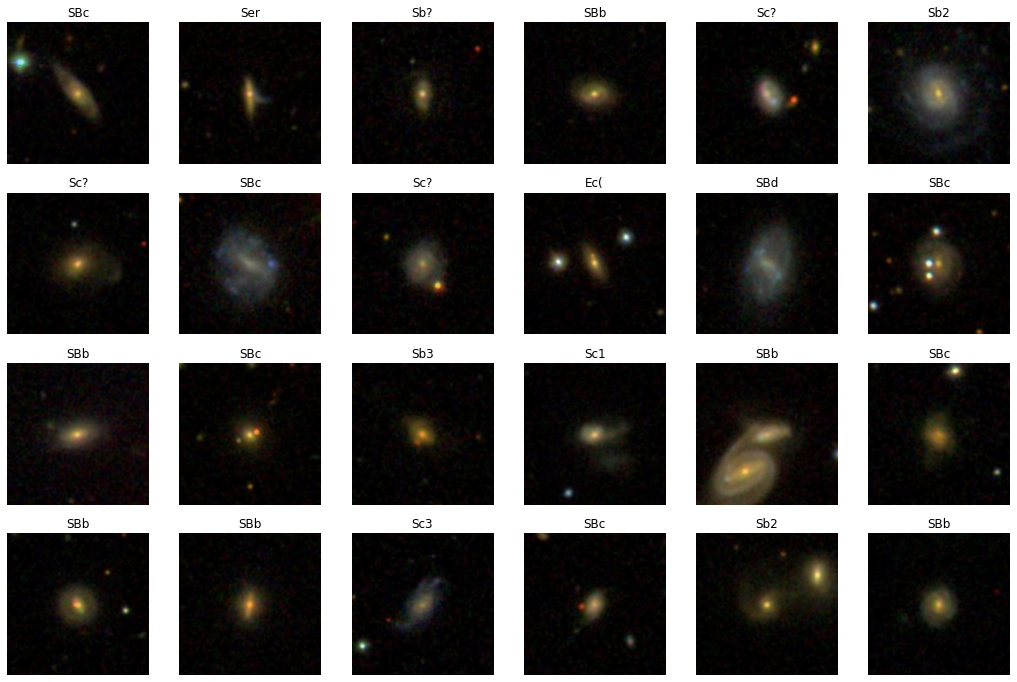

In [10]:
base_path = "/content/gdrive/My Drive/colab/datasets/sdss-train"

def get_parent_label(o, prefix = 3):
  return Path(o).parent.name if prefix == None else Path(o).parent.name[0:prefix]

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=42),
    get_y=get_parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(base_path, bs=128)

dls.show_batch(max_n=24)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,5.045802,3.714883,0.852603,30:40


epoch,train_loss,valid_loss,error_rate,time
0,3.939626,3.467604,0.815007,39:20
1,3.209969,3.343246,0.813277,39:06
2,2.437522,3.342749,0.811704,39:33


In [25]:
hdf.dtypes

dr7objid                                             int64
ra                                                 float64
dec                                                float64
rastring                                            object
decstring                                           object
                                                    ...   
t11_arms_number_a37_cant_tell_weight               float64
t11_arms_number_a37_cant_tell_fraction             float64
t11_arms_number_a37_cant_tell_weighted_fraction    float64
t11_arms_number_a37_cant_tell_debiased             float64
t11_arms_number_a37_cant_tell_flag                   int64
Length: 231, dtype: object

In [38]:
def test_prediction(hdf, files):
  positive = 0
  negative = 0
  for f in random.shuffle(files):
    object_id = np.int64(os.path.basename(f).split('.')[0])
    gz2_class = hdf[hdf.dr7objid == object_id]['gz2_class'].tolist()
    target_class = list(map(lambda c: c[0:3], gz2_class))
    predict_class, _, probs = learn.predict(PILImage.create(f))
    print(f"Predicted Class={predict_class}, Confidence: {probs[0]:.2f}, Target Class: {target_class}")
    if predict_class in target_class:
      positive += 1
    else:
      negative += 1
    if positive + negative > 1000:
      break
  return (positive, negative)


success, failure = test_prediction(hdf, get_image_files(base_path))
print(f' success = {success}, failure = {failure}, TP Accuracy: {success/(success + failure):.4f}')


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sb4, Confidence: 0.03, Target Class: ['Sc+']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBd, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc+']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sc+']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sc+']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.07, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sb+']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb+']


Predicted Class=Ei, Confidence: 0.10, Target Class: ['Ei']


Predicted Class=Ei, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Ei, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Sc+, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=Ei, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=Sa(, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=Ei, Confidence: 0.02, Target Class: ['Ei']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Ei, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Sb2, Confidence: 0.04, Target Class: ['Ei']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ei']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Ei']


Predicted Class=Er, Confidence: 0.01, Target Class: ['Er']


Predicted Class=Er, Confidence: 0.08, Target Class: ['Er']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Er']


Predicted Class=Er(, Confidence: 0.03, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Er']


Predicted Class=Er, Confidence: 0.00, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er']


Predicted Class=Sc2, Confidence: 0.03, Target Class: ['Er']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Er']


Predicted Class=SBd, Confidence: 0.02, Target Class: ['Er']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Er']


Predicted Class=Sa?, Confidence: 0.00, Target Class: ['Er']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Er']


Predicted Class=Sd1, Confidence: 0.00, Target Class: ['Er']


Predicted Class=Er(, Confidence: 0.02, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er']


Predicted Class=Er(, Confidence: 0.00, Target Class: ['Er']


Predicted Class=Sb2, Confidence: 0.02, Target Class: ['Er']


Predicted Class=Sa(, Confidence: 0.00, Target Class: ['Er']


Predicted Class=Sb1, Confidence: 0.03, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er']


Predicted Class=Er, Confidence: 0.00, Target Class: ['Er']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb3, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc1, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sc?, Confidence: 0.02, Target Class: ['Sb1']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.03, Target Class: ['Sb1']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sc2, Confidence: 0.04, Target Class: ['Sb1']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sb2']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb2']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sb2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Ei(, Confidence: 0.03, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.03, Target Class: ['Sc2']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sd4, Confidence: 0.02, Target Class: ['Sb(']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.03, Target Class: ['Sb(']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sb(']


Predicted Class=Sb2, Confidence: 0.02, Target Class: ['Sb(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.03, Target Class: ['Sb(']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb(']


Predicted Class=SBb, Confidence: 0.04, Target Class: ['Sb(']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sd3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Sd?, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=Ec, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Sen, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=Ec, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=Sb1, Confidence: 0.02, Target Class: ['Ec']


Predicted Class=Sc(, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=Ec, Confidence: 0.01, Target Class: ['Ec']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ec']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Ei(, Confidence: 0.02, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sd2, Confidence: 0.02, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sc+, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb3']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sb3, Confidence: 0.01, Target Class: ['Sb3']


Predicted Class=Sc+, Confidence: 0.02, Target Class: ['Sb3']


Predicted Class=SBc, Confidence: 0.03, Target Class: ['Sb3']


Predicted Class=Er(, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Sb(, Confidence: 0.09, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.02, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=Sc1, Confidence: 0.03, Target Class: ['Er(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.02, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=Er(, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Er(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Er(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sd1, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=A, Confidence: 0.15, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc4, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.03, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=Ec(, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sb']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sd(, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb, Confidence: 0.03, Target Class: ['Sb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sb']


Predicted Class=Sb1, Confidence: 0.02, Target Class: ['Sb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sb+, Confidence: 0.02, Target Class: ['Sb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sb']


Predicted Class=Sb1, Confidence: 0.03, Target Class: ['Sb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb']


Predicted Class=Sb1, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Sb1, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Sb1, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=SBd, Confidence: 0.04, Target Class: ['Ei(']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Sen, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Sen, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=SBa, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Sen, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Sd, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Ser, Confidence: 0.03, Target Class: ['Ei(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=A, Confidence: 0.18, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Sen, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=Ei(, Confidence: 0.03, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.04, Target Class: ['Ei(']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Ei(']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ei(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sc+, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb1, Confidence: 0.04, Target Class: ['SBb']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb(, Confidence: 0.02, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sb1, Confidence: 0.03, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sa, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBd, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.03, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.03, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc4, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sc2, Confidence: 0.02, Target Class: ['Sc2']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Sc2']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc2']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.04, Target Class: ['Sb?']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.03, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sd(, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sb1']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.03, Target Class: ['Sb1']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=SBd, Confidence: 0.01, Target Class: ['Sb1']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb1']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc+, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc3']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sc3']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Er(, Confidence: 0.03, Target Class: ['SBb']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sb1, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sb1, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.01, Target Class: ['Sc(']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=SBa, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Sc(, Confidence: 0.00, Target Class: ['Sc(']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Sen, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.05, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Sen, Confidence: 0.03, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Sb2, Confidence: 0.03, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.03, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Seb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=Sc1, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc3, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.03, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Sc1, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBc']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.03, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=Ser, Confidence: 0.00, Target Class: ['Ser']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['SBb']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['SBb']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sb(, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBb, Confidence: 0.02, Target Class: ['Sc?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sc?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sc?']


Predicted Class=Sb+, Confidence: 0.01, Target Class: ['Sc?']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sc?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sc?, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sc?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sc2, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBd, Confidence: 0.08, Target Class: ['Sb?']


Predicted Class=Sb2, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb2, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb2, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.03, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sc2, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sc?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Ser, Confidence: 0.02, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb(, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBb, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=SBc, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.00, Target Class: ['Sb?']


Predicted Class=Ser, Confidence: 0.01, Target Class: ['Sb?']


Predicted Class=Sb?, Confidence: 0.02, Target Class: ['Sb?']
 success = 437, failure = 564, TP Accuracy: 0.4366
